## Portfolio assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)

In [156]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import pandas as pd
import seaborn as sns
import numpy as np
type_dict = {'Team': 'object', 'Season': 'object', 'KEY': 'object', 'Player': 'object', 'Position': 'object', 'Appearances': 'float64', 'Goals': 'float64', 'Started': 'float64', 'Started As A Sub': 'float64', 'Came On': 'float64', 'Taken Off': 'float64', 'Own Goals': 'float64', 'Type Of Goal': 'object', 'First Half': 'float64', 'Second Half': 'float64', 'First Scorer': 'object', 'Last Scorer': 'object', 'Home': 'float64', 'Away': 'float64', 'Right Foot': 'float64', 'Left Foot': 'float64', 'Header': 'float64', 'Other Method': 'float64', 'Open Play': 'float64', 'Cross': 'float64', 'Free Kick': 'float64', 'Direct Free Kick': 'float64', 'Throw In': 'float64', 'Penalty': 'float64', 'Corner': 'float64', 'Other Type Of Play': 'float64', 'Minutes played': 'float64', 'Min/goal': 'float64', 'Assists': 'float64', '% Assists': 'float64', 'Leading Recipient': 'object', 'Recipient Goals': 'float64', 'CS': 'float64', '% Clean Sheets': 'float64', 'Hat Tricks': 'float64', 'Yellow Cards': 'float64', 'Yellow - First Half': 'float64', 'Yellow - Second Half': 'float64', 'Yellow - Home': 'float64', 'Yellow - Away': 'float64', 'Yelow - Minutes Played': 'float64', 'Minutes per Yellow Cards': 'float64', 'Sent Off': 'float64', 'Straight Red Card': 'float64', 'Two Yellow Cards': 'float64', 'Red - First Half': 'float64', 'Red - Second Half': 'float64', 'Red - Home': 'float64', 'Red - Away': 'float64', 'Red - Minutes Played': 'float64', 'Minutes per Red Cards': 'float64'}
playerStatsAllLeagues = pd.read_csv('merged-csv-files.csv', sep=',', dtype=type_dict)
playerStatsAllLeaguesNoTeams = playerStatsAllLeagues[(playerStatsAllLeagues['Position'] != 'Other') & (~playerStatsAllLeagues['Position'].isna())]
playerStatsAllLeaguesNoTeams

,League,Team,Season,KEY,Player,Position,Appearances,Goals,Started,Started As A Sub,...,Minutes per Yellow Cards,Sent Off,Straight Red Card,Two Yellow Cards,Red First Half,Red Second Half,Red Home,Red Away,Red Minutes Played,Minutes per Red Cards
1,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,Eden Hazard,Midfielder,38.0,14.0,38.0,0.0,...,1689.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,John Terry,Defender,38.0,5.0,38.0,0.0,...,1710.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,Branislav Ivanovic,Defender,38.0,4.0,38.0,0.0,...,310.91,1.0,NaN,1.0,NaN,1.0,NaN,1.0,3420.0,3420.0
4,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,Nemanja Matic,Midfielder,36.0,1.0,35.0,1.0,...,312.40,1.0,1.0,NaN,NaN,1.0,1.0,NaN,3164.0,3164.0
5,Premier League,Chelsea,2014/15,Premier League|Chelsea|2014/15,Gary Cahill,Defender,36.0,1.0,33.0,5.0,...,596.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27915,Scottish Premiership,Inverness Cali,2016/17,Scottish Premiership|Inverness Cali|2016/17,Jason Brown,Midfielder,0.0,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27916,Scottish Premiership,Inverness Cali,2016/17,Scottish Premiership|Inverness Cali|2016/17,Daniel Hoban,Goalkeeper,0.0,0.0,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27917,Scottish Premiership,Inverness Cali,2016/17,Scottish Premiership|Inverness Cali|2016/17,Sam Robertson,Defender,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27918,Scottish Premiership,Inverness Cali,2016/17,Scottish Premiership|Inverness Cali|2016/17,Andrew MacRae,Forward,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Position & Goals

Split the dataset into a train (70%) and test (30%) set.

In [157]:
playerStatsAllLeaguesNoTeams_train, playerStatsAllLeaguesNoTeams_test = train_test_split(playerStatsAllLeaguesNoTeams, test_size=0.3, random_state=42, stratify=playerStatsAllLeaguesNoTeams['Position'])
print(playerStatsAllLeaguesNoTeams_train.shape, playerStatsAllLeaguesNoTeams_test.shape)

(18645, 57) (7992, 57)


Use the train set to fit a DecisionTreeClassifier

In [158]:
features = ['Goals']
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(playerStatsAllLeaguesNoTeams_train[features].fillna(0), playerStatsAllLeaguesNoTeams_train['Position'])

DecisionTreeClassifier(max_depth=5)

Create decision tree model

In [159]:
def plot_tree_classification(model, features, class_names):
    dot_data = tree.export_graphviz(model, 
                                    out_file=None, 
                                    feature_names=features, 
                                    class_names=class_names, 
                                    filled=True, 
                                    rounded=True, 
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph

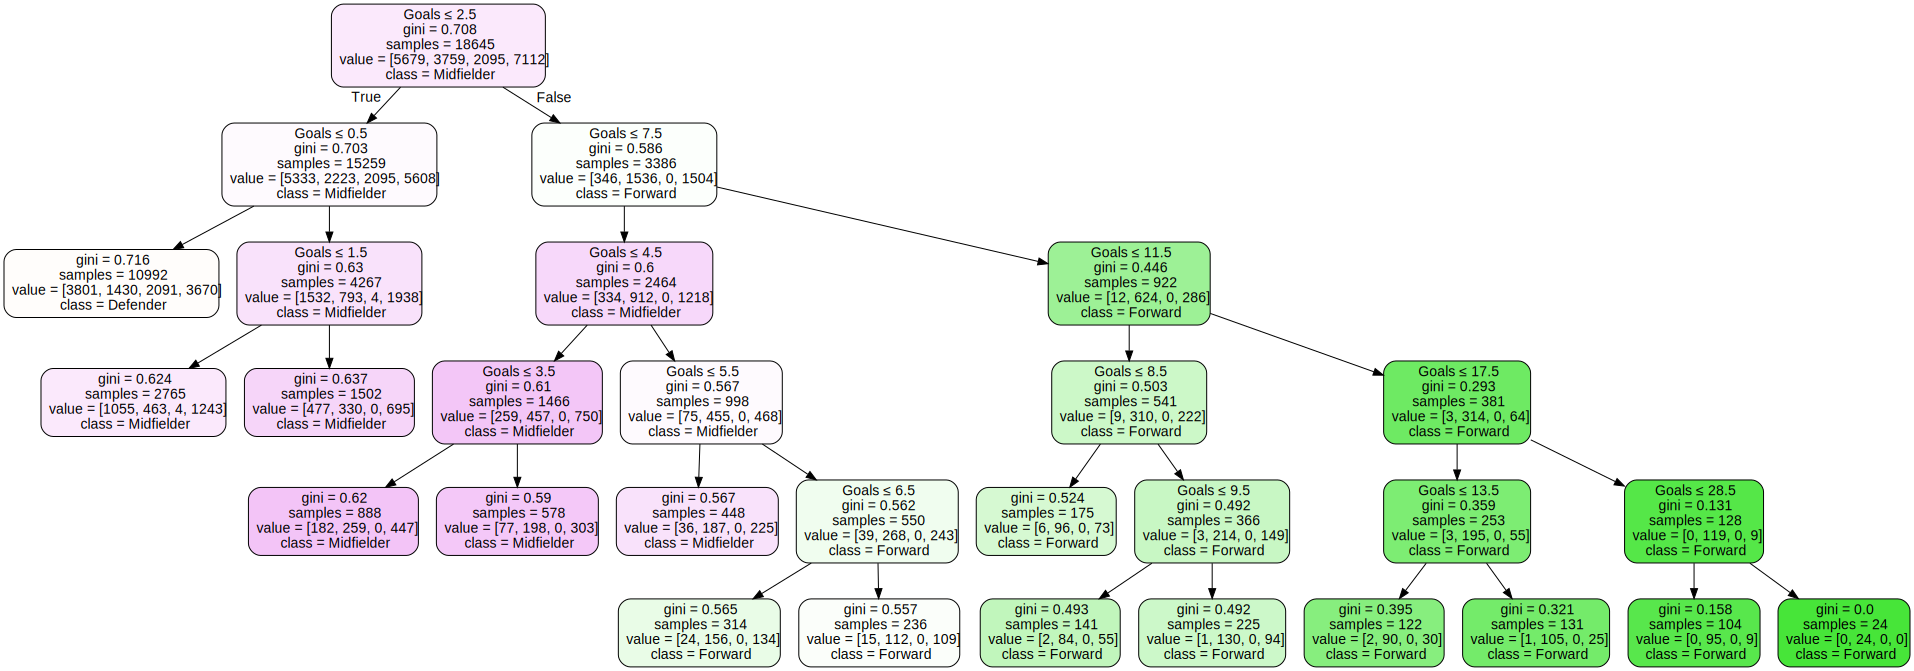

In [160]:
plot_tree_classification(dt, features, np.sort(playerStatsAllLeaguesNoTeams_train['Position'].unique()))

Predict using the test array

In [161]:
predictions_test = dt.predict(playerStatsAllLeaguesNoTeams_test[features])
predictions_test

array(['Midfielder', 'Midfielder', 'Defender', ..., 'Defender',
       'Midfielder', 'Defender'], dtype=object)

Calculating the accuracy of the tree 

In [162]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

predictionsOnTrainset = dt.predict(playerStatsAllLeaguesNoTeams_train[features])
predictionsOnTestset = dt.predict(playerStatsAllLeaguesNoTeams_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, playerStatsAllLeaguesNoTeams_train['Position'])
accuracyTest = calculate_accuracy(predictionsOnTestset, playerStatsAllLeaguesNoTeams_test['Position'])

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.4079377849289354
Accuracy on test set 0.403028028028028


There is a very little difference between the accuracies of the sets, both are just really poor. because a lot of defenders and goalkeepers score no goals, the tree finds it hard to classify these positions. The program then chooses to completely ignore the goalkeeper position. Also there are a lot of attackers that score a few or even no goals. Using the amount of goals to predict the position did not turn out te be usefull. 